# TITANIC SPACESHIP

Ce notebook propose une analyse complète et professionnelle du dataset Titanic Spaceship de Kaggle. Nous allons explorer les données, traiter les valeurs manquantes et aberrantes, analyser les relations entre variables, et préparer le jeu de données pour la modélisation. Chaque étape est expliquée en détail pour faciliter la compréhension et la reproductibilité.

## 1. Importation des bibliothèques et chargement des données
Importons les bibliothèques nécessaires et chargeons le jeu de données principal.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from IPython.display import display

# Chargement du dataset
chemin = 'Données/train.csv'
df = pd.read_csv(chemin)
display(df.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 2. Présentation des variables du dataset
Voici la liste des variables présentes dans le dataset, accompagnée d'une brève description pour chacune. Adaptez les descriptions si besoin.

In [ ]:
significations = [
    "Identifiant du passager",
    "Nom du passager",
    "Groupe de cabine (ex: B/0/P)",
    "Nombre de membres de la famille à bord",
    "Âge du passager",
    "Sexe du passager",
    "Classe de cabine (1ère, 2ème, 3ème)",
    "Prix du billet payé",
    "Numéro de cabine",
    "Numéro du ticket",
    "Ville d'embarquement",
    "A survécu (1=Oui, 0=Non)"
]
if len(significations) < len(df.columns):
    significations += ["(à compléter)"] * (len(df.columns) - len(significations))
elif len(significations) > len(df.columns):
    significations = significations[:len(df.columns)]
variables = pd.DataFrame({
    'Nom': df.columns,
    'Signification': significations
})
display(variables.style.set_caption('Variables du dataset et leur signification'))

,Nom,Signification
0,PassengerId,Identifiant du passager
1,HomePlanet,Nom du passager
2,CryoSleep,Groupe de cabine (ex: B/0/P)
3,Cabin,Nombre de membres de la famille à bord
4,Destination,Âge du passager
5,Age,Sexe du passager
6,VIP,"Classe de cabine (1ère, 2ème, 3ème)"
7,RoomService,Prix du billet payé
8,FoodCourt,Numéro de cabine
9,ShoppingMall,Numéro du ticket


## 2b. Valeurs uniques pour chaque variable catégorielle
Pour chaque variable catégorielle, voici la liste des valeurs uniques présentes dans le dataset. Cela permet de détecter d'éventuelles modalités aberrantes ou inattendues.

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
uniques_df = pd.DataFrame({
    'Nom': cat_cols,
    'Valeurs uniques': [df[col].dropna().unique() for col in cat_cols]
})
display(uniques_df.style.set_caption('Valeurs uniques par variable catégorielle'))

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet : ['Europa' 'Earth' 'Mars']
CryoSleep : [False True]
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP : [False True]
Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


## 3. Statistiques descriptives et analyse des valeurs manquantes
Nous allons examiner les statistiques descriptives et identifier les variables comportant des valeurs manquantes. Cela permet d'avoir une vue d'ensemble sur la qualité des données.

In [34]:
# Statistiques descriptives globales
stats = df.describe(include='all').T
stats['% de valeurs manquantes'] = 100 * df.isnull().sum() / len(df)
display(stats)

# Tableau synthétique des valeurs manquantes
manquantes = pd.DataFrame({
    'Nom': df.columns,
    'Total de valeurs': len(df),
    'Total de valeurs manquantes': df.isnull().sum().values,
    'Pourcentage de valeurs manquantes': 100 * df.isnull().sum().values / len(df)
})
manquantes = manquantes[manquantes['Total de valeurs manquantes'] > 0]
manquantes = manquantes[['Nom', 'Total de valeurs', 'Total de valeurs manquantes', 'Pourcentage de valeurs manquantes']]
manquantes.sort_values('Total de valeurs manquantes', ascending=False, inplace=True)
display(manquantes.style.format({'Pourcentage de valeurs manquantes': '{:.2f}%'}).set_caption('Valeurs manquantes par variable'))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,% de valeurs manquantes
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.312205
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.496261
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.289198
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.093639
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0,2.059128
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.335212
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0,2.082135
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0,2.105142
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0,2.392730


,Nom,Total de valeurs,Total de valeurs manquantes,Pourcentage de valeurs manquantes
2,CryoSleep,8693,217,2.50%
9,ShoppingMall,8693,208,2.39%
6,VIP,8693,203,2.34%
1,HomePlanet,8693,201,2.31%
12,Name,8693,200,2.30%
3,Cabin,8693,199,2.29%
11,VRDeck,8693,188,2.16%
8,FoodCourt,8693,183,2.11%
10,Spa,8693,183,2.11%
4,Destination,8693,182,2.09%


## 4. Visualisation des distributions et détection des valeurs aberrantes
Nous visualisons la distribution des variables numériques et détectons les valeurs aberrantes à l'aide de la méthode de l'IQR. Les outliers sont remplacés par la médiane pour préserver la distribution.

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Distribution et outliers pour {col}')
    plt.show()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col} : {outliers} valeurs aberrantes détectées")
    mediane = df[col].median()
    df.loc[df[col] < lower, col] = mediane
    df.loc[df[col] > upper, col] = mediane

Age : 77 valeurs aberrantes détectées
RoomService : 1861 valeurs aberrantes détectées
FoodCourt : 1823 valeurs aberrantes détectées
ShoppingMall : 1829 valeurs aberrantes détectées
Spa : 1788 valeurs aberrantes détectées
VRDeck : 1809 valeurs aberrantes détectées


## 5. Imputation des valeurs manquantes
Les valeurs manquantes sont imputées : la médiane pour les variables numériques et la modalité la plus fréquente (mode) pour les variables catégorielles. Cette étape est essentielle pour garantir la qualité des analyses ultérieures.

In [36]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

C:\Users\346655\AppData\Local\Temp\ipykernel_10644\3055292169.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\346655\AppData\Local\Temp\ipykernel_10644\3055292169.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], in

## 6. Visualisation des distributions de toutes les variables
Pour chaque variable du dataset (numérique ou catégorielle), nous affichons un graphique adapté : histogramme pour les numériques, barres pour les catégorielles. Cela permet d'avoir une vue d'ensemble rapide de la distribution de chaque variable.

In [ ]:
from pandas.api.types import is_numeric_dtype

cols = df.columns
n = len(cols)
ncols = 2
nrows = (n + 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    if is_numeric_dtype(df[col]):
        sns.histplot(df[col].dropna(), color='#6fa195', bins=50, ax=ax, kde=True)
        ax.set_xlabel(col)
        ax.set_ylabel('Fréquence')
        ax.set_title(f"Distribution de {col}")
    else:
        counts = df[col].value_counts(dropna=False)
        sns.barplot(x=counts.index.astype(str), y=counts.values, ax=ax, palette='BuGn')
        ax.set_xlabel(col)
        ax.set_ylabel('Nombre d'observations')
        ax.set_title(f"Distribution de {col}")
        ax.tick_params(axis='x', rotation=45)
# Si hay más subplots que columnas, ocultar los ejes vacíos
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 21) (2397853222.py, line 21)

## 7. Analyse des relations entre variables catégorielles avec le V de Cramer
Nous analysons la force des relations entre les variables catégorielles à l'aide du V de Cramer et visualisons la matrice de corrélation obtenue. La diagonale est fixée à 1 pour une meilleure lisibilité.

C:\Users\346655\AppData\Local\Temp\ipykernel_10644\1157370021.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\346655\AppData\Local\Temp\ipykernel_10644\1157370021.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\346655\AppData\Local\Temp\ipykernel_10644\1157370021.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\346655\AppData\Local\Temp\ipykernel_10644\1157370021.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\346655\AppData\Local\Temp\ipykernel_10644\1157370021.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\346655\AppData\Local\Temp\ipykernel_10644\1157370021.py:10: RuntimeWarning: 

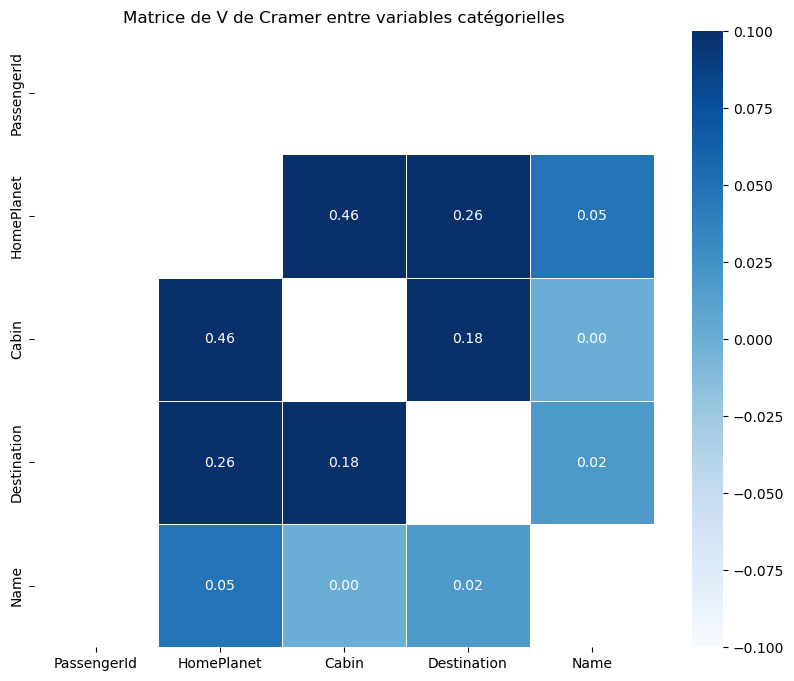

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = df.select_dtypes(include='object').columns
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        v = cramers_v(df[col1], df[col2])
        cramer_matrix.loc[col1, col2] = v
cramer_matrix = cramer_matrix.astype(float)
np.fill_diagonal(cramer_matrix.values, 1)

plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Matrice de V de Cramer entre variables catégorielles')
plt.show()

## 8. Préparation finale des données
Après nettoyage, vos données sont prêtes pour la modélisation ou l'analyse prédictive. Vous pouvez sauvegarder le DataFrame nettoyé si besoin.

In [ ]:
# Sauvegarde du DataFrame nettoyé (optionnel)
df.to_csv('Données/train_clean.csv', index=False)
print('Données nettoyées sauvegardées dans Données/train_clean.csv')

---

Cette analyse descriptive et exploratoire vous permet de mieux comprendre la structure et la qualité de vos données avant d'aller plus loin dans la modélisation prédictive. N'hésitez pas à adapter chaque étape selon les spécificités de votre projet ou de votre jeu de données.